In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.datasets import make_blobs

In [3]:
make_blobs?

Signature:
make_blobs(
    n_samples=100,
    n_features=2,
    *,
    centers=None,
    cluster_std=1.0,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=None,
    return_centers=False,
)
Docstring:
Generate isotropic Gaussian blobs for clustering.

Read more in the :ref:`User Guide <sample_generators>`.

Parameters
----------
n_samples : int or array-like, default=100
    If int, it is the total number of points equally divided among
    clusters.
    If array-like, each element of the sequence indicates
    the number of samples per cluster.

    .. versionchanged:: v0.20
        one can now pass an array-like to the ``n_samples`` parameter

n_features : int, default=2
    The number of features for each sample.

centers : int or array-like of shape (n_centers, n_features), default=None
    The number of centers to generate, or the fixed center locations.
    If n_samples is an int and centers is None, 3 centers are generated.
    If n_samples is array-like, centers 

In [23]:
X, Y = make_blobs(n_samples = 500, n_features=2, centers=2, random_state=40)

In [24]:
X.shape

(500, 2)

In [25]:
Y

array([0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,

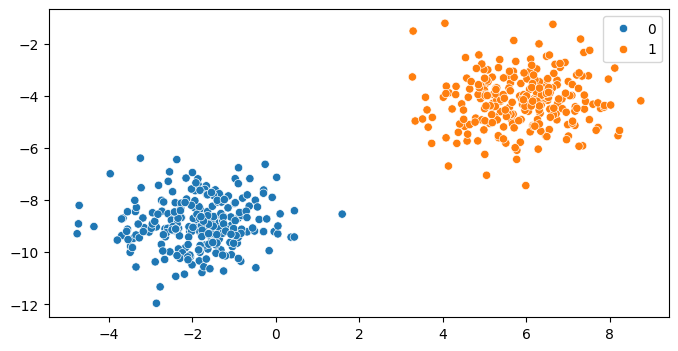

In [29]:
plt.figure(figsize=[8,4])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)
plt.show()

In [38]:
def sigmoid(z):
    sig = 1/(1+np.exp(-z))
    return sig

In [31]:
def predict(X, weights):
    z = np.dot(X, weights)
    prediction = sigmoid(z)
    return prediction

In [33]:
def loss(X, Y, weights):
    Y_hat = predict(X, weights)
    loss = np.mean(-Y*np.log(Y_hat) - (1-Y)*np.log((1-Y_hat)))
    return loss

In [34]:
def update(X, Y, weights, learning_rate):
    Y_hat = predict(X, weights)
    dw = np.dot(X.T, Y_hat-Y)
    m = X.shape[0]
    weights = weights - learning_rate*dw/(float(m))
    return weights

In [43]:
def train(X, Y, learning_rate, maxEpoch=500):
    ones = np.ones((X.shape[0], 1))
    X = np.hstack((ones, X))
    weights = np.zeros(X.shape[1])
    for epoch in range(maxEpoch):
        weights = update(X, Y, weights, learning_rate)
        if epoch%10==0:
            l = loss(X, Y, weights)
            print("Epoch Number ", epoch, " || Loss : ", l)
    return weights                   

In [49]:
weights = train(X, Y, learning_rate=0.01)

Epoch Number  0  || Loss :  0.6438095061817423
Epoch Number  10  || Loss :  0.36243945520882287
Epoch Number  20  || Loss :  0.24600817958253396
Epoch Number  30  || Loss :  0.18509768643516833
Epoch Number  40  || Loss :  0.148289338438188
Epoch Number  50  || Loss :  0.12380765674935772
Epoch Number  60  || Loss :  0.10639655570435344
Epoch Number  70  || Loss :  0.09339333483398736
Epoch Number  80  || Loss :  0.08331540198947422
Epoch Number  90  || Loss :  0.07527517756323573
Epoch Number  100  || Loss :  0.06871008796996968
Epoch Number  110  || Loss :  0.06324678835153083
Epoch Number  120  || Loss :  0.05862798594694609
Epoch Number  130  || Loss :  0.054670692392234245
Epoch Number  140  || Loss :  0.05124124793295203
Epoch Number  150  || Loss :  0.04823976666254309
Epoch Number  160  || Loss :  0.045590109668523886
Epoch Number  170  || Loss :  0.04323322588835712
Epoch Number  180  || Loss :  0.04112261275539387
Epoch Number  190  || Loss :  0.03922114992483379
Epoch Number

## Visualisation and Prediction

In [46]:
def get_preds(X_test, weights, labels=True):
    if X_test.shape[1] != weights.shape[0]:
        ones = np.ones(X_test.shape[0], 1)
        X_test = np.stack(ones, X_test)
    probs = predict(X_test, weights)
    if not labels:
        return probs
    else:
        labels = np.zeros(probs.shape)
        labels[probs >= 0.5] = 1
        return labels

In [50]:
x1 = np.linspace(-2, 10, 10)
x2 = -(weights[0] + weights[1]*x1)/weights[2]

In [51]:
print(x1)

[-2.         -0.66666667  0.66666667  2.          3.33333333  4.66666667
  6.          7.33333333  8.66666667 10.        ]


In [52]:
print(x2)

[  5.8549103    1.87337032  -2.10816966  -6.08970964 -10.07124962
 -14.0527896  -18.03432958 -22.01586956 -25.99740954 -29.97894952]


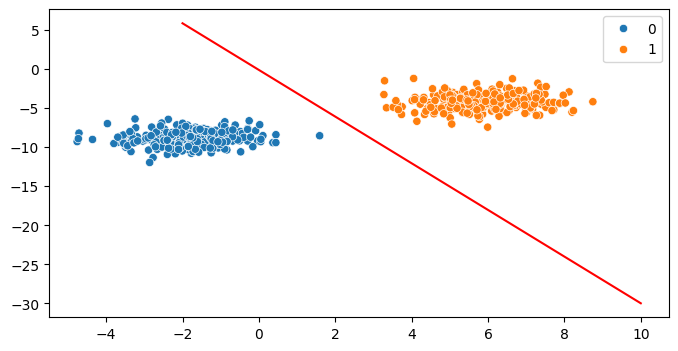

In [53]:
plt.figure(figsize=[8,4])
sns.scatterplot(x=X[:,0], y=X[:,1], hue=Y)
plt.plot(x1, x2, color="red")
plt.show()

### we get the best fit line